<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_08_more_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More examples on Deep Learning
- from "모두의 딥러닝"

## Deep Learning with Mnist datset

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import sys
import os
import tensorflow as tf

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


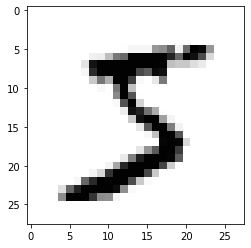

In [2]:
# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
# 코드로 확인
X_train.shape, Y_class_train.shape

((60000, 28, 28), (60000,))

In [4]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float64')  / 255

# 바이너리화 과정
Y_train = utils.to_categorical(Y_class_train, 10)
Y_test = utils.to_categorical(Y_class_test, 10)

# X_train[0], Y_train[0]
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

### MLP model


Epoch 00001: val_loss improved from inf to 0.17117, saving model to ./mnist_model/01-0.1712.hdf5

Epoch 00002: val_loss improved from 0.17117 to 0.10911, saving model to ./mnist_model/02-0.1091.hdf5

Epoch 00003: val_loss improved from 0.10911 to 0.08820, saving model to ./mnist_model/03-0.0882.hdf5

Epoch 00004: val_loss improved from 0.08820 to 0.07520, saving model to ./mnist_model/04-0.0752.hdf5

Epoch 00005: val_loss improved from 0.07520 to 0.06906, saving model to ./mnist_model/05-0.0691.hdf5

Epoch 00006: val_loss improved from 0.06906 to 0.06606, saving model to ./mnist_model/06-0.0661.hdf5

Epoch 00007: val_loss improved from 0.06606 to 0.06316, saving model to ./mnist_model/07-0.0632.hdf5

Epoch 00008: val_loss did not improve from 0.06316

Epoch 00009: val_loss did not improve from 0.06316

Epoch 00010: val_loss improved from 0.06316 to 0.06253, saving model to ./mnist_model/10-0.0625.hdf5

Epoch 00011: val_loss did not improve from 0.06253

Epoch 00012: val_loss did not i

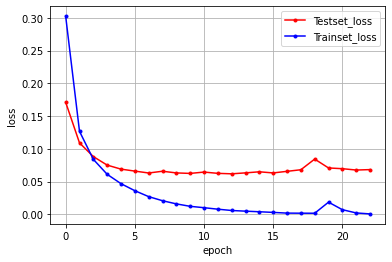

In [5]:
# model
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model environment (compile)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model callbacks
MODEL_DIR = './mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# model fitting (train)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# model evaluation (test)
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


### Using CNN model

In [6]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [7]:
X_train.shape, Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [8]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

- ModelCheckpoint(): 모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간 저장한다. 학습시간이 오래 걸린다면, 모델이 개선된 validation score를 도출해낼 때마다 weight를 중간 저장함으로써, 혹시 중간에 memory overflow나 crash가 나더라도 다시 weight를 불러와서 학습을 이어나갈 수 있기 때문에, 시간을 save해 줄 수 있다.

In [9]:
import os
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './mnist_cnn_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_cnn_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05906, saving model to ./mnist_cnn_model/01-0.0591.hdf5

Epoch 00002: val_loss improved from 0.05906 to 0.05130, saving model to ./mnist_cnn_model/02-0.0513.hdf5

Epoch 00003: val_loss improved from 0.05130 to 0.03407, saving model to ./mnist_cnn_model/03-0.0341.hdf5

Epoch 00004: val_loss improved from 0.03407 to 0.03061, saving model to ./mnist_cnn_model/04-0.0306.hdf5

Epoch 00005: val_loss improved from 0.03061 to 0.02887, saving model to ./mnist_cnn_model/05-0.0289.hdf5

Epoch 00006: val_loss improved from 0.02887 to 0.02860, saving model to ./mnist_cnn_model/06-0.0286.hdf5

Epoch 00007: val_loss improved from 0.02860 to 0.02845, saving model to ./mnist_cnn_model/07-0.0284.hdf5

Epoch 00008: val_loss improved from 0.02845 to 0.02641, saving model to ./mnist_cnn_model/08-0.0264.hdf5

Epoch 00009: val_loss improved from 0.02641 to 0.02581, saving model to ./mnist_cnn_model/09-0.0258.hdf5

Epoch 00010: val_loss improved from 0.02581 to 0.

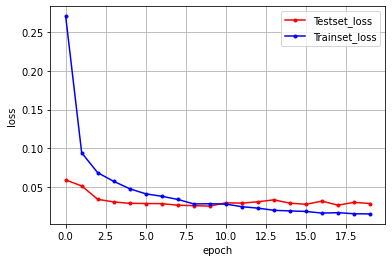

In [11]:
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

(28, 28)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

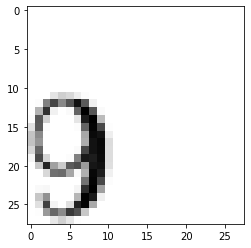

In [30]:
from PIL import Image, ImageOps
image = Image.open('digit9_4.png' ).convert('LA')
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28,28,1))

## 2. Reuters news category classification

### for exercise
- v = Embedding(20001 ,256, input_length=500)
  - input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  - output_dim: Integer. Dimension of the dense embedding.
  - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
- shape:
  - Input shape: 2D tensor with shape: (batch_size, input_length)
  - Output shape: 3D tensor with shape: (batch_size, input_length, output_dim).

- 임베딩 층은 다음과 같은 세 개의 인자를 받는다.
  - 첫번째 인자 : 텍스트 데이터의 전체 단어 집합의 크기다. 만약 갖고 있는 데이터의 단어들이 인코딩이 0부터 20,000까지 되었다면 단어 집합의 크기는 20,001이 되어야 한다. (인덱스에 주의)
  - 두번째 인자 : 임베딩이 되고 난 후의 단어의 차원이다. 만약, 이 값을 256으로 준다면 모든 단어의 차원이 256이 된다.
  - input_length : 입력 시퀀스의 길이다. 만약 갖고 있는 각 데이터의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 된다.
- Turns positive integers (indexes) into dense vectors of fixed size.
e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

In [31]:
# example
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
sentence = ['멋있어 최고야 짱이다 감탄이다 우와', 
            '헛소리 지껄이네', 
            '닥쳐 자식아', 
            '우와 대단하다', 
            '우수한 성적', 
            '형편없다', 
            '최상의 퀄리티 멋있어']
y_train = [1, 0, 0, 1, 1, 0, 1]    # positive(1) or negative(0)
t = Tokenizer()
t.fit_on_texts(sentence)

In [32]:
t.word_index

{'감탄이다': 5,
 '닥쳐': 8,
 '대단하다': 10,
 '멋있어': 1,
 '성적': 12,
 '우수한': 11,
 '우와': 2,
 '자식아': 9,
 '지껄이네': 7,
 '짱이다': 4,
 '최고야': 3,
 '최상의': 14,
 '퀄리티': 15,
 '헛소리': 6,
 '형편없다': 13}

In [33]:
t.texts_to_sequences(sentence)

[[1, 3, 4, 5, 2], [6, 7], [8, 9], [2, 10], [11, 12], [13], [14, 15, 1]]

In [34]:
vocab_size = len(t.word_index)+1
x_encoded = t.texts_to_sequences(sentence)
max_length = max(len(i) for i in x_encoded)
print(max_length)
x_padded = pad_sequences(x_encoded, maxlen=max_length, padding='post')
print(x_padded)

5
[[ 1  3  4  5  2]
 [ 6  7  0  0  0]
 [ 8  9  0  0  0]
 [ 2 10  0  0  0]
 [11 12  0  0  0]
 [13  0  0  0  0]
 [14 15  1  0  0]]


In [35]:
# Embedding(): input shape : (input_dim, output_dim, [input_length])
#                           input_length: Length of input sequences, when it is constant. 
#                           This argument is required if you are going to
#                           connect Flatten then Dense layers upstream (without it, 
#                           the shape of the dense outputs cannot be computed).
#              output shape : (batch_size, input_length, output_dim)


model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_length))
# 모든 임베딩 벡터는 4차원을 가지게 됨.
model.add(Flatten()) # Dense의 입력으로 넣기 위함임.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 4)              64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# no of parameters in Embedding layer: 16 * 4 = 64

### Reuter Dataset

In [39]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras import utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [40]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, 
                                                         test_split=0.2)

# 데이터 확인하기

category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
[len(X_train[i]) for i in range(10)]

2113536/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


[87, 56, 139, 224, 101, 116, 100, 100, 82, 106]

In [41]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

- 딥러닝은 단어 대신 숫자를 데이터로 요구함. 여기서는 해당 단어가 데이터 안에서 몇 번이나 사용되었는지
- 빈도에 따라 번호를 붙임.  -> tokenizer 함수 필요
- keras 는 이미 이 작업이 수행된 상태임.
- num_words = 1000: 빈도가 1~1000 에 해당하는 단어만 선택해서 불러옴
- 각 기사의 단어 수가 각각 다르므로 단어의 수를 맞춰 주어야 함. (전처리 함수 sequence 사용) : 100보다 크면 100개만, 적으면 0 으로 패딩.

In [42]:
# 
# 데이터 전처리
x_train = preprocessing.sequence.pad_sequences(X_train, maxlen=100)
x_test = preprocessing.sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(x_train.shape, y_train.shape)
[len(x_train[i]) for i in range(10)]

(8982, 100) (8982, 46)


[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [43]:
# 모델의 설정
# Embedding(불러온 단어의 총갯수, 기사당 단어수) -> 단어벡터 생성
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# no of parameters in LSTM: ((100+100)*100 + 100 ) * 4

Epoch 1/20
90/90 [==============================] - 6s 41ms/step - loss: 2.9852 - accuracy: 0.3241 - val_loss: 2.2438 - val_accuracy: 0.3624
Epoch 2/20
90/90 [==============================] - 3s 34ms/step - loss: 2.0978 - accuracy: 0.4571 - val_loss: 1.8498 - val_accuracy: 0.5174
Epoch 3/20
90/90 [==============================] - 3s 33ms/step - loss: 1.7967 - accuracy: 0.5319 - val_loss: 1.7750 - val_accuracy: 0.5450
Epoch 4/20
90/90 [==============================] - 3s 33ms/step - loss: 1.7384 - accuracy: 0.5418 - val_loss: 1.6832 - val_accuracy: 0.5690
Epoch 5/20
90/90 [==============================] - 3s 33ms/step - loss: 1.6290 - accuracy: 0.5680 - val_loss: 1.6355 - val_accuracy: 0.5864
Epoch 6/20
90/90 [==============================] - 3s 33ms/step - loss: 1.5220 - accuracy: 0.6209 - val_loss: 1.5689 - val_accuracy: 0.5980
Epoch 7/20
90/90 [==============================] - 3s 33ms/step - loss: 1.4087 - accuracy: 0.6402 - val_loss: 1.4979 - val_accuracy: 0.6233
Epoch 8/20
90

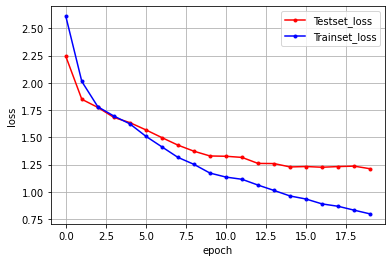

In [44]:
import numpy as np
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. IMDB(Internet Movie databse) with LSTM/CNN
- 영화 정보, 출연진, 개봉 정보, 연화 후기, 평점 등
- 25,000 여개 데이터에 대해 긍정/부정 평가 (binary)
- 앞의 로이터 뉴스 처럼 각 데이터의 전처리를 마친 상태임

### Conv1D
- usually used for NLP
- 아래 예제: vector_lebgth=6, kernel_size=2,

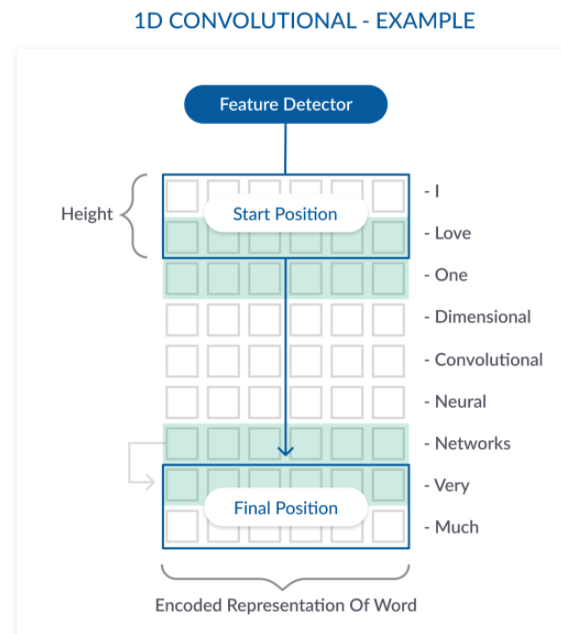

- in NLP, row(vocab), column(embedding_features)
- that is, filter_size = (n, embedding_dim)

In [45]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding

from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


In [52]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)  # max word in sentence = 100
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))  # vector dim =100
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

- 1DConv: (5\*100)*64 + 64 = 32,064
- (5 window \* 100 length) * 64 filters + 64

Epoch 1/5
250/250 [==============================] - 9s 28ms/step - loss: 0.5692 - accuracy: 0.6560 - val_loss: 0.3345 - val_accuracy: 0.8515
Epoch 2/5
250/250 [==============================] - 7s 27ms/step - loss: 0.2823 - accuracy: 0.8838 - val_loss: 0.3253 - val_accuracy: 0.8568
Epoch 3/5
250/250 [==============================] - 7s 27ms/step - loss: 0.2393 - accuracy: 0.9034 - val_loss: 0.3366 - val_accuracy: 0.8573
Epoch 4/5
250/250 [==============================] - 7s 27ms/step - loss: 0.1985 - accuracy: 0.9224 - val_loss: 0.3367 - val_accuracy: 0.8535
Epoch 5/5
782/782 [==============================] - 5s 5ms/step - loss: 0.3642 - accuracy: 0.8504

 Test Accuracy: 0.8504


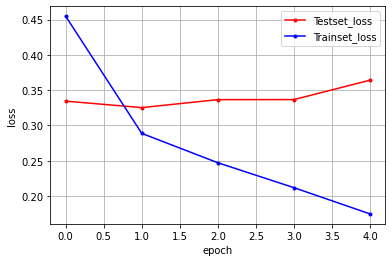

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, 
                    batch_size=100, 
                    epochs=5, 
                    validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Exercise (연습)

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch,input_length), and 
# the largest integer (i.e. word index) in the input  
# should be no larger than 999 (vocabulary size).  
# Now model.output_shape is (None, 10, 64), where `None` is the batch  
# dimension.  
model.summary()
input_array = np.random.randint(1000, size=(100, 10))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 64)            64000     
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________
(100, 10, 64)
